# Homework 14

In [58]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from matplotlib.colors import ListedColormap
import pysal


In [59]:
powerplants = pd.read_csv('powerplants.csv')

In [60]:
powerplants.head(4)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800


In [61]:
powerplants.dtypes

Plant_Code      int64
Plant_Name     object
Utility_Na     object
Utility_ID      int64
sector_nam     object
City           object
County         object
Zip             int64
Street_Add     object
PrimSource     object
Total_MW      float64
Coal_MW       float64
NG_MW         float64
Crude_MW      float64
Bio_MW        float64
Hydro_MW      float64
HydroPS_MW    float64
Nuclear_MW    float64
Solar_MW      float64
Wind_MW       float64
Geo_MW        float64
Other_MW      float64
source_des     object
tech_desc      object
Source         object
Period          int64
Latitude      float64
Longitude     float64
dtype: object

In [62]:
us_states = gpd.read_file('/Users/catherine/Desktop/lede/13-homework/cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
us_states

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999..."
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000..."
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27..."


In [63]:
#us_states = us_states[(us_states.STUSPS != 'AK') & (us_states.STUSPS != 'HI') & (us_states.STUSPS != 'VI') & (us_states.STUSPS != 'AS') & (us_states.STUSPS != 'PR') & (us_states.STUSPS != 'GU') & (us_states.STUSPS != 'MP')] 

In [64]:
pd.set_option('display.max_columns', 1000)

In [65]:
points = powerplants.apply(lambda z: Point(z.Longitude, z.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
powerplants.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)


In [66]:
from shapely.geometry import Polygon
us_states.to_crs({'init': 'epsg:4326'}).intersects(powerplants).head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

### 2. Make a map of air quality stations, color coded by average air quality


In [67]:
air_quality = pd.read_csv('pm25_annual_fixed.csv')
air_quality.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18


In [68]:
air_quality.dtypes

State Code                         int64
County Code                        int64
Site Num                           int64
Parameter Code                     int64
POC                                int64
Latitude                         float64
Longitude                        float64
Datum                             object
Parameter Name                    object
Sample Duration                   object
Pollutant Standard                object
Metric Used                       object
Method Name                       object
Year                               int64
Units of Measure                  object
Event Type                        object
Observation Count                  int64
Observation Percent                int64
Completeness Indicator            object
Valid Day Count                    int64
Required Day Count                 int64
Exceptional Data Count             int64
Null Data Count                    int64
Primary Exceedance Count         float64
Secondary Exceed

In [69]:
points = air_quality.apply(lambda z: Point(z.Longitude, z.Latitude), axis=1)
air_quality = gpd.GeoDataFrame(air_quality, geometry=points)
air_quality.crs = {'init': 'epsg:4326'}

# GROUP THREE: Buffers, or more interesting/complicated analysis

# Do states with coal power plants have dirtier air?

In [70]:
coal = powerplants[(powerplants.Coal_MW > 0)]

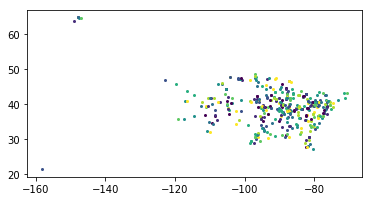

In [71]:
coal.plot()

In [72]:
us_states_converted = us_states.to_crs(coal.crs)

In [73]:
#r = gpd.sjoin(us_states_converted, coal, how='left', op='contains')

(-21940545.97915272,
 22010628.389096022,
 -2282230.1177306436,
 12143473.806799324)

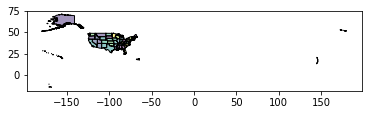

In [126]:
us_states_converted.plot()
ax.axis('off')

def does_intersect(row):
    return pd.Series({
        'states': row['NAME'], 
        'geometry': row['geometry'],
        'powerplants': powerplants.intersects(row.geometry).sum()})


us_states_converted.apply(does_intersect, axis=1)

In [75]:
#states_with_powerplants = gpd.sjoin(states.reset_index(), powerplants, how='inner', op='intersects')
#states['powerplants'] = states_with_powerplants.groupby('index').count()
#states['powerplants'] = states['powerplants'].fillna(0)

In [76]:
def does_intersect(row):
    return pd.Series({
        'states': row['NAME'],
        'geometry': row['geometry'],
        'coal_p': coal.intersects(row.geometry).sum()})

states_coal = us_states_converted.apply(does_intersect, axis=1)

In [77]:
states_coal.head()

,coal_p,geometry,states
0,7,"(POLYGON ((-88.053375 30.506987, -88.051087999...",Alabama
1,5,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",Alaska
2,6,"POLYGON ((-114.816294 32.508038, -114.814321 3...",Arizona
3,5,"POLYGON ((-94.6178329666013 36.4994141203285, ...",Arkansas
4,2,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",California


In [78]:
states_coal = states_coal[(states_coal.coal_p > 0)]

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855050000009)

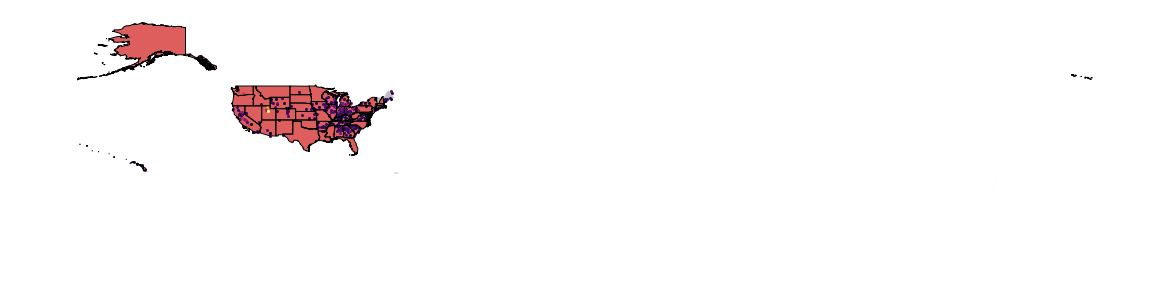

In [79]:
ax = us_states.plot(figsize=(20,20), color='grey', linewidth=0.25, edgecolor='white')
air_quality.plot(column= '1st Max Value', cmap='inferno', ax=ax, markeredgewidth=0, markersize=3)
states_coal.plot(color='red', ax=ax, markeredgewidth=0, markersize=3, alpha=0.5)
ax.axis('off')

# Which power plants are within 75 miles of New York City?

In [80]:
new_york = us_states[(us_states.NAME == 'New York')]

In [81]:
new_york

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY,"(POLYGON ((-72.0368298202051 41.2498425393847,..."


In [82]:
#75 miles = 120701 m

In [83]:
buffered_new_york = new_york.to_crs({'proj': 'merc'}).buffer(120701)

In [84]:
buffered_new_york.head()

43    POLYGON ((-8999782.185105283 5168242.479563759...
dtype: object

In [130]:
powerplants = powerplants.to_crs({'proj': 'merc'})
us_states = us_states.to_crs({'proj': 'merc'})

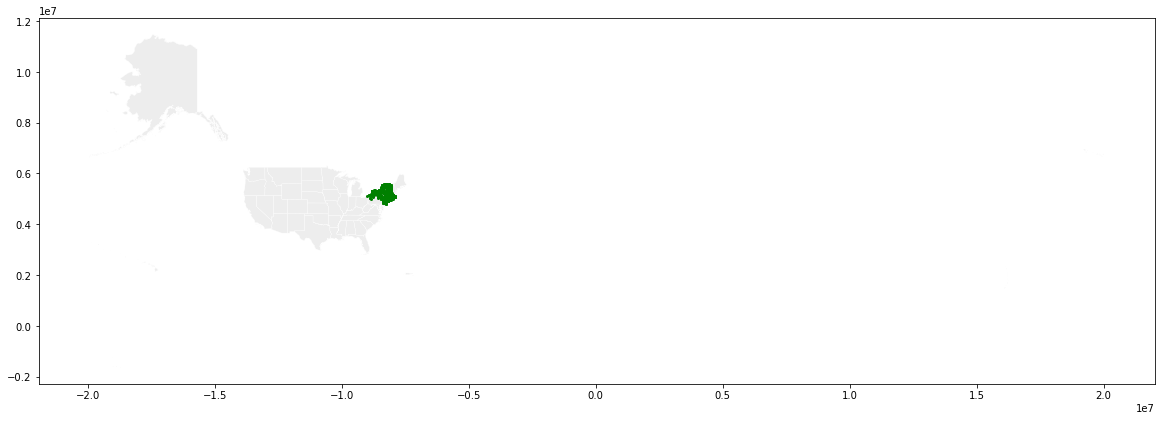

In [112]:
ax = us_states.plot(color='#DDDDDD', linewidth=0.25, edgecolor='white', figsize=(20, 20))
powerplants[powerplants.intersects(buffered_new_york.unary_union)].plot(color='green', ax=ax)

In [ ]:
#1*10**7

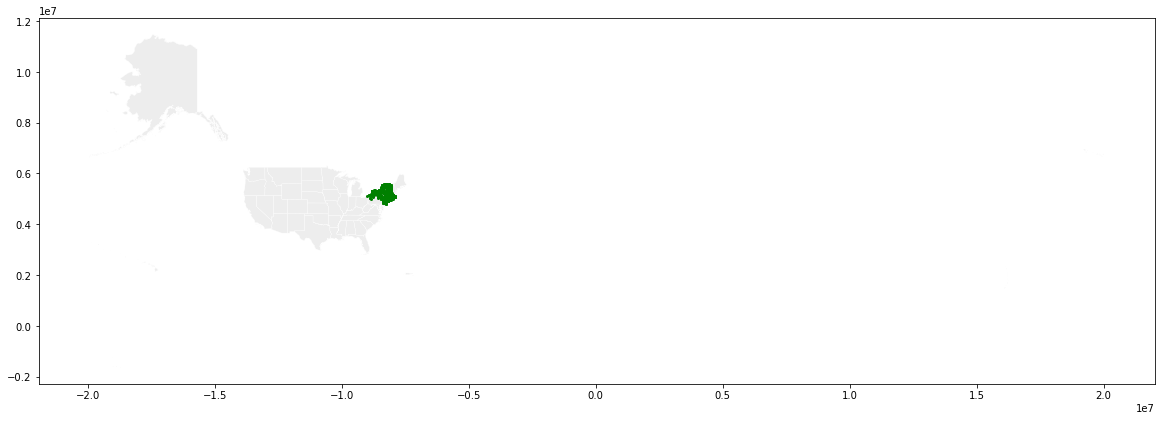

In [122]:
ax = us_states.plot(color='#DDDDDD', linewidth=0.25, edgecolor='white', figsize=(20, 20))
powerplants[powerplants.intersects(buffered_new_york.unary_union)].plot(color='green', ax=ax)
#ax.set_xlim(-130,-50)
#ax.set_ylim(20,50)

# Map all of the power plants in New York, New Jersey, Pennsylvania and Connecticut. Have a nice bottom layer of those 4 states.

In [88]:
four = ['New York','New Jersey','Pennsylvania','Connecticut']

In [141]:
states_four = us_states[us_states.NAME.isin(four)]

(-9012040.3472093977,
 -7942684.535300279,
 4639125.0152499042,
 5639243.0537331542)

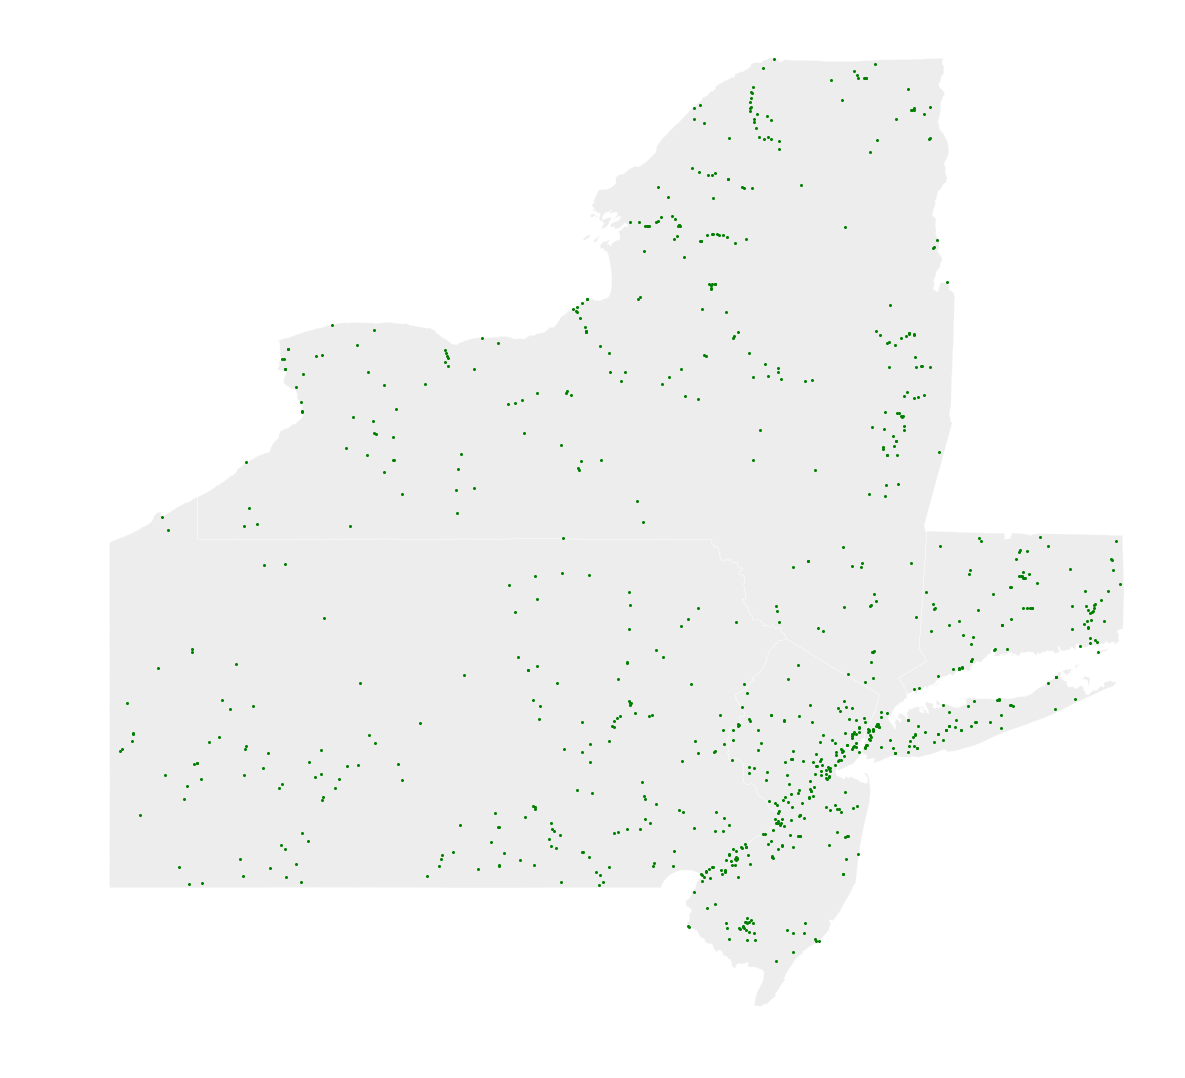

In [90]:
ax = states_four.plot(color='#DDDDDD', linewidth=0.25, edgecolor='white', figsize=(20, 20))
powerplants[powerplants.intersects(states_four.unary_union)].plot(ax=ax, color='green')
ax.axis('off')

# What is the most popular power source by state?

In [95]:
#state = us_states.loc[0]

In [103]:
#us_states['count'] = us_states.apply(lambda state: powerplants.within(state.geometry).sum(), axis=1)

In [101]:
#us_states

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,count
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((-9802056.867629165 3547198.51410046...,72
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,(POLYGON ((-14998883.39671989 7986050.12278189...,138
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-12781291.38285079 3807223.522069516...,113
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,POLYGON ((-10532808.98580507 4344142.099989594...,55
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,(POLYGON ((-13202983.0836341 3935428.266584977...,1222
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,POLYGON ((-12140531.82974559 4637779.187709421...,153
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,(POLYGON ((-8099765.003031947 5019976.12205696...,88
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,(POLYGON ((-8411918.102235692 4768497.86260573...,25
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,POLYGON ((-8584932.301979976 4685414.971896482...,2
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,(POLYGON ((-9047980.418107381 3650602.63200780...,139


In [105]:
data = gpd.sjoin(us_states.reset_index(), powerplants, how='inner', op='intersects')
data.head(2)

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,count,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((-9802056.867629165 3547198.51410046...,72,12,16,Martin Dam,Alabama Power Co,195,Electric Utility,Dadeville,Elmore,36078,675 Overlook Drive,hydroelectric,186.0,0.0,0.0,0.0,NaN,186.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((-9802056.867629165 3547198.51410046...,72,4158,55411,Hillabee Energy Center,CER Generation LLC,55987,IPP Non-CHP,Alexander City,Tallapoosa,35010,152 Brick Plant Road,natural gas,721.8,0.0,721.8,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 721.8 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,33.000669,-85.903278


In [111]:
data.groupby('NAME')['PrimSource'].value_counts()

NAME           PrimSource    
Alabama        hydroelectric     23
               natural gas       22
               biomass           13
               coal               6
               other              3
               petroleum          3
               nuclear            2
Alaska         petroleum         90
               hydroelectric     23
               natural gas       15
               coal               4
               wind               4
               biomass            1
               other              1
Arizona        solar             57
               natural gas       30
               hydroelectric      7
               coal               5
               biomass            4
               wind               4
               pumped storage     3
               petroleum          2
               nuclear            1
Arkansas       hydroelectric     19
               natural gas       18
               biomass            9
               coal               

# Get the average (or highest/worst) PM2.5 within XXX miles of each power plant (you pick the distance). Is coal dirtier than other kinds of plants?

(-21940545.97915272,
 22010628.389096022,
 -2282230.1177306436,
 12143473.806799324)

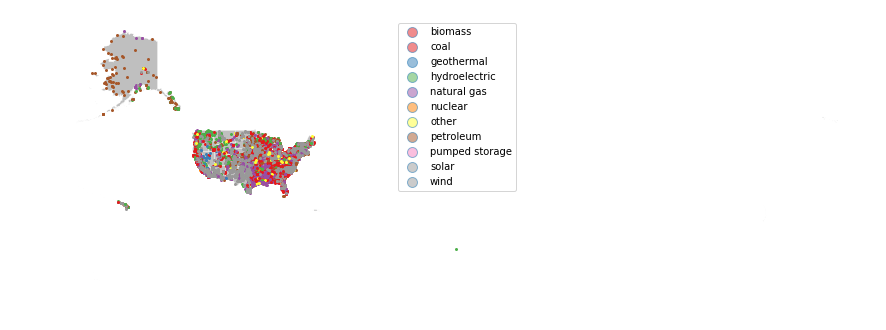

In [124]:
ax = us_states.plot(figsize=(15,15), color='grey', linewidth=0.25, edgecolor='white')
powerplants.plot(ax=ax, markeredgewidth=0, markersize=3, legend=True, column='PrimSource')
ax.axis('off')

(-20070688.335968602,
 955747.06361755251,
 -573116.87857991329,
 12035454.450178195)

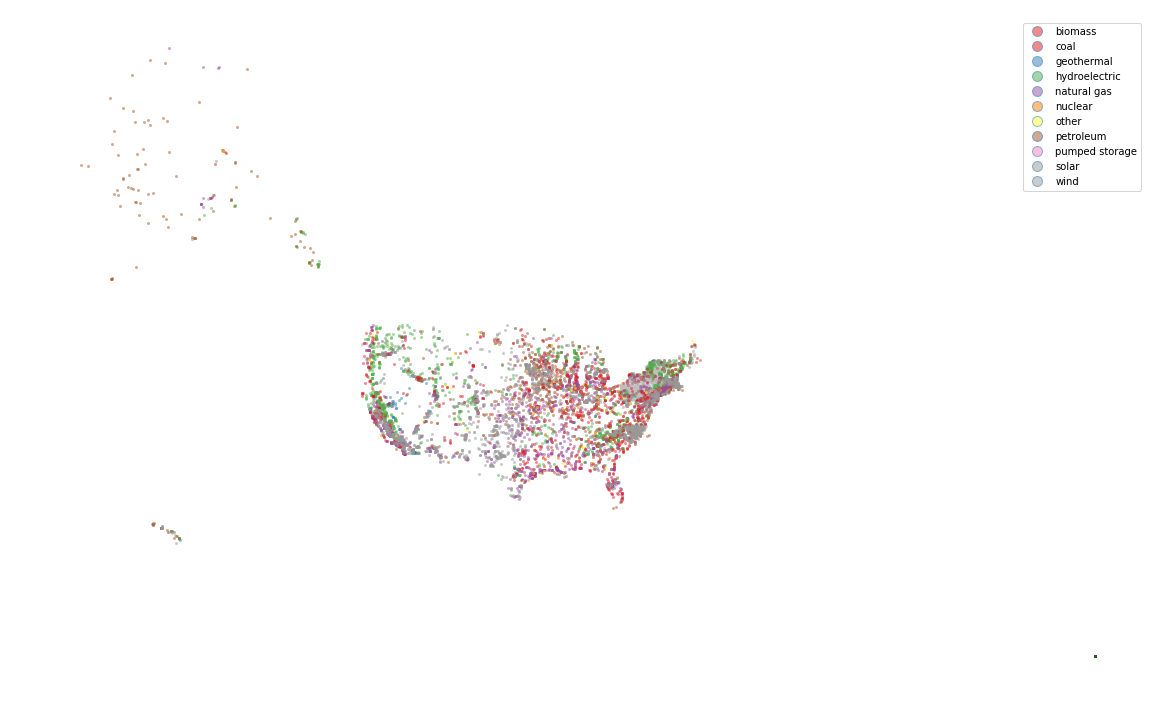

In [143]:
ax = us_states.plot(figsize=(20,20), color='grey', linewidth=0.25, edgecolor='white')
air_quality.plot(column= '1st Max Value', cmap='gray', ax=ax, markeredgewidth=0, markersize=3)
powerplants.plot(ax=ax, markeredgewidth=0, markersize=3, legend=True, column='PrimSource', alpha=0.5)
ax.axis('off')

In [175]:
air_quality.describe()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Year,Observation Count,Observation Percent,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,2nd Max Value,3rd Max Value,4th Max Value,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile
count,441.000000,441.000000,441.000000,441.0,441.0,441.000000,441.000000,441.0,441.000000,441.000000,441.000000,441.000000,441.0,441.000000,441.000000,441.000000,441.0,441.000000,441.000000,441.000000,440.000000,437.000000,436.000000,0.0,0.0,0.0,0.0,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,26.997732,87.342404,441.376417,88101.0,1.0,38.965749,-91.017166,2017.0,29.848073,19.562358,29.526077,152.607710,0.0,1.675737,0.140590,0.140590,0.0,7.938500,4.595340,20.140816,16.279773,13.967048,12.512385,NaN,NaN,NaN,NaN,20.055329,19.704989,17.084580,14.603175,10.422676,7.251474,3.355102
std,16.580177,101.760920,1160.815483,0.0,0.0,4.015912,15.110010,0.0,23.205251,6.697444,22.856367,97.245111,0.0,3.000239,0.790977,0.790977,0.0,2.334062,2.235661,9.080059,7.467294,6.560468,5.844599,NaN,NaN,NaN,NaN,8.748315,7.957368,6.295084,5.361745,3.742433,2.928963,1.350901
min,1.000000,1.000000,1.000000,88101.0,1.0,19.420300,-159.366240,2017.0,1.000000,0.000000,1.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.0,1.678652,0.000000,4.400000,3.100000,1.000000,1.000000,NaN,NaN,NaN,NaN,4.400000,4.200000,3.200000,3.000000,2.200000,1.000000,-0.800000
25%,13.000000,29.000000,6.000000,88101.0,1.0,36.608000,-94.226234,2017.0,15.000000,16.000000,15.000000,122.000000,0.0,0.000000,0.000000,0.000000,0.0,6.603333,3.325113,15.000000,12.375000,10.600000,9.500000,NaN,NaN,NaN,NaN,15.000000,14.800000,13.200000,11.600000,8.300000,5.800000,2.600000
50%,23.000000,67.000000,15.000000,88101.0,1.0,39.774979,-86.214683,2017.0,28.000000,23.000000,28.000000,122.000000,0.0,1.000000,0.000000,0.000000,0.0,7.932955,4.189613,18.500000,15.200000,13.200000,12.000000,NaN,NaN,NaN,NaN,18.500000,18.400000,16.500000,14.100000,10.200000,7.200000,3.300000
75%,39.000000,119.000000,83.000000,88101.0,1.0,41.657232,-82.456229,2017.0,30.000000,25.000000,30.000000,122.000000,0.0,2.000000,0.000000,0.000000,0.0,8.994118,5.271970,23.000000,18.825000,16.100000,14.525000,NaN,NaN,NaN,NaN,23.000000,22.700000,19.700000,16.500000,12.100000,8.300000,3.900000
max,56.000000,810.000000,9997.000000,88101.0,1.0,47.568236,-68.016195,2017.0,120.000000,33.000000,120.000000,365.000000,0.0,23.000000,7.000000,7.000000,0.0,25.050000,20.152543,75.700000,63.700000,57.900000,53.600000,NaN,NaN,NaN,NaN,75.700000,60.000000,46.400000,46.400000,39.300000,39.300000,11.500000


In [181]:
air_quality[(air_quality['Arithmetic Mean'] > 15.000000)]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
41,6,29,10,88101,1,35.385574,-119.015009,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,10,8,N,10,122,0,1,1.0,1.0,Certification not required,0,15.820000,13.592792,46.4,2017-01-31 00:00,32.6,2017-01-28 00:00,18.3,2017-01-16 00:00,15.9,2017-01-25 00:00,NaN,NaN,NaN,NaN,46.4,46.4,46.4,46.4,18.3,10.4,6.2,Bakersfield-Golden/M St,"2820 M St., Bakersfield, CA 93301",California,Kern,Bakersfield,"Bakersfield, CA",2017-05-03,POINT (-119.015009 35.385574)
43,6,29,16,88101,1,35.322928,-118.999167,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,8,7,N,8,122,0,3,1.0,1.0,Certification not required,0,17.625000,14.541541,43.7,2017-01-31 00:00,33.2,2017-01-28 00:00,20.9,2017-01-16 00:00,17.1,2017-01-04 00:00,NaN,NaN,NaN,NaN,43.7,43.7,43.7,43.7,33.2,17.1,1.0,Bakersfield-Airport (Planz),"410 E. PLANZ RD. BAKERSFIELD, CA 93307",California,Kern,Bakersfield,"Bakersfield, CA",2017-05-03,POINT (-118.999167 35.32292800000001)
44,6,31,4,88101,1,36.102180,-119.566954,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,11,9,N,11,122,0,1,1.0,1.0,Certification not required,0,15.663636,13.370136,46.2,2017-01-31 00:00,26.3,2017-01-28 00:00,24.9,2017-01-27 00:00,21.2,2017-01-07 00:00,NaN,NaN,NaN,NaN,46.2,46.2,46.2,26.3,24.9,10.0,4.4,Corcoran-Patterson,1520 PATTERSON AVE.,California,Kings,Corcoran,"Hanford-Corcoran, CA",2017-05-03,POINT (-119.566954 36.10218)
45,6,39,2010,88101,1,36.953256,-120.034203,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,2,7,N,2,30,0,1,0.0,0.0,Certification not required,0,21.050000,17.889802,33.7,2017-01-31 00:00,8.4,2017-01-07 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7,33.7,33.7,33.7,33.7,33.7,8.4,Madera-City,28261 Avenue 14 Madera CA 93638,California,Madera,Madera,"Madera, CA",2017-05-03,POINT (-120.034203 36.953256)
64,6,99,5,88101,1,37.641583,-120.994622,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2017,Micrograms/cubic meter (LC),No Events,2,7,N,2,30,0,1,1.0,1.0,Certification not required,0,25.050000,20.152543,39.3,2017-01-31 00:00,10.8,2017-01-07 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.3,39.3,39.3,39.3,39.3,39.3,10.8,Modesto-14th Street,"814 14TH ST., MODESTO",California,Stanislaus,Modesto,"Modesto, CA",2017-05-03,POINT (-120.994622 37.641583)
404,53,77,9,88101,1,46.598056,-120.499167,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,19,16,N,19,122,0,0,2.0,2.0,Certification not required,0,16.268421,11.556434,44.5,2017-01-16 00:00,37.5,2017-01-19 00:00,32.2,2017-01-25 00:00,26.3,2017-01-13 00:00,NaN,NaN,NaN,NaN,44.5,44.5,44.5,37.5,19.2,12.8,

In [183]:
dirty = air_quality[(air_quality['Arithmetic Mean'] > 15.000000)]

In [184]:
dirty.to_crs({'proj': 'merc'})

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
41,6,29,10,88101,1,35.385574,-119.015009,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,10,8,N,10,122,0,1,1.0,1.0,Certification not required,0,15.820000,13.592792,46.4,2017-01-31 00:00,32.6,2017-01-28 00:00,18.3,2017-01-16 00:00,15.9,2017-01-25 00:00,NaN,NaN,NaN,NaN,46.4,46.4,46.4,46.4,18.3,10.4,6.2,Bakersfield-Golden/M St,"2820 M St., Bakersfield, CA 93301",California,Kern,Bakersfield,"Bakersfield, CA",2017-05-03,POINT (-13248690.19863687 4191659.628764676)
43,6,29,16,88101,1,35.322928,-118.999167,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,8,7,N,8,122,0,3,1.0,1.0,Certification not required,0,17.625000,14.541541,43.7,2017-01-31 00:00,33.2,2017-01-28 00:00,20.9,2017-01-16 00:00,17.1,2017-01-04 00:00,NaN,NaN,NaN,NaN,43.7,43.7,43.7,43.7,33.2,17.1,1.0,Bakersfield-Airport (Planz),"410 E. PLANZ RD. BAKERSFIELD, CA 93307",California,Kern,Bakersfield,"Bakersfield, CA",2017-05-03,POINT (-13246926.67526372 4183147.267120334)
44,6,31,4,88101,1,36.102180,-119.566954,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,11,9,N,11,122,0,1,1.0,1.0,Certification not required,0,15.663636,13.370136,46.2,2017-01-31 00:00,26.3,2017-01-28 00:00,24.9,2017-01-27 00:00,21.2,2017-01-07 00:00,NaN,NaN,NaN,NaN,46.2,46.2,46.2,26.3,24.9,10.0,4.4,Corcoran-Patterson,1520 PATTERSON AVE.,California,Kings,Corcoran,"Hanford-Corcoran, CA",2017-05-03,POINT (-13310132.43498277 4289512.162053463)
45,6,39,2010,88101,1,36.953256,-120.034203,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,2,7,N,2,30,0,1,0.0,0.0,Certification not required,0,21.050000,17.889802,33.7,2017-01-31 00:00,8.4,2017-01-07 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7,33.7,33.7,33.7,33.7,33.7,8.4,Madera-City,28261 Avenue 14 Madera CA 93638,California,Madera,Madera,"Madera, CA",2017-05-03,POINT (-13362146.35573643 4406904.275196236)
64,6,99,5,88101,1,37.641583,-120.994622,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2017,Micrograms/cubic meter (LC),No Events,2,7,N,2,30,0,1,1.0,1.0,Certification not required,0,25.050000,20.152543,39.3,2017-01-31 00:00,10.8,2017-01-07 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.3,39.3,39.3,39.3,39.3,39.3,10.8,Modesto-14th Street,"814 14TH ST., MODESTO",California,Stanislaus,Modesto,"Modesto, CA",2017-05-03,POINT (-13469059.70976461 4502818.452297101)
404,53,77,9,88101,1,46.598056,-120.499167,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,19,16,N,19,122,0,0,2.0,2.0,Certification not required,0,16.268421,11.556434,44.5,2017-01-16 00:00,37.5,2017-01-19 00:00,32.2,2017-01-25 00:00,

In [185]:
dirty = dirty.to_crs({'proj': 'merc'})

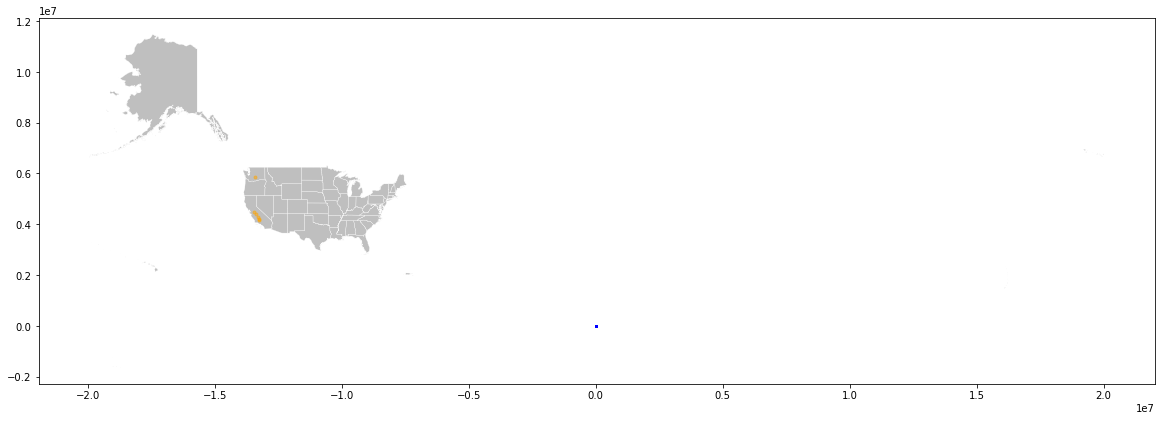

In [187]:
ax = us_states.plot(figsize=(20,20), color='grey', linewidth=0.25, edgecolor='white')
coal.plot(markeredgewidth=0, markersize=3, alpha=0.5, color='blue', ax=ax)
dirty.plot(markeredgewidth=1, markersize=3, legend=True, alpha=0.5, color='orange', ax=ax)

#ax.axis('off')
#ax.set_xlim(-130,-75)
#ax.set_ylim(20,50)

# Make a map of the power plants within 150 miles of New York City. I want it centered on New York City, zoomed in a good amount.

In [194]:
us_states.crs = {'init': 'epsg:2163'}
powerplants.crs = {'init': 'epsg:2163'}


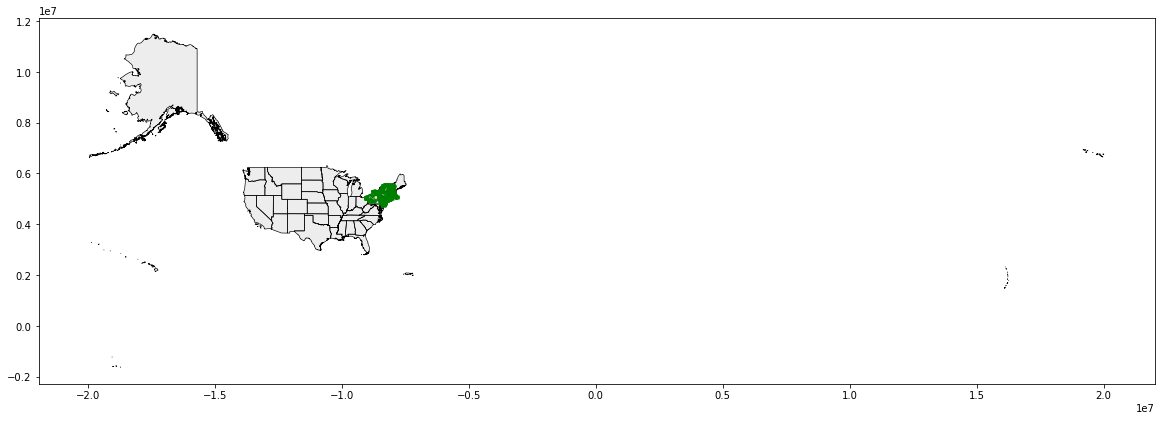

In [195]:
buffered_new_york1 = new_york.to_crs({'proj': 'merc'}).buffer(241402)

ax = us_states.plot(color='#DDDDDD', linewidth=0.65, edgecolor='black', figsize=(20, 20))
powerplants[powerplants.centroid.intersects(buffered_new_york1.unary_union)].plot(ax=ax, color='green', alpha=2.5)
#ax.axis('off')
#ax.set_xlim(4639125,5639243)
#ax.set_ylim(-9161585,-7727876)

